### Chapter 9 - Handling Imbalanced Datasets

#### 9.2. Example of Imbalanced Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

churn_data = pd.read_csv("https://raw.githubusercontent.com/albayraktaroglu/Datasets/master/churn.csv")


In [2]:
churn_data = churn_data.drop("State", axis = 1)
churn_data = churn_data.drop("Phone", axis = 1)
churn_data = churn_data.drop("VMail Plan", axis = 1)
churn_data = churn_data.drop("Int'l Plan", axis = 1)


In [3]:
churn_data.head()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
churn_data.shape

(3333, 17)

<AxesSubplot:xlabel='Churn?', ylabel='count'>

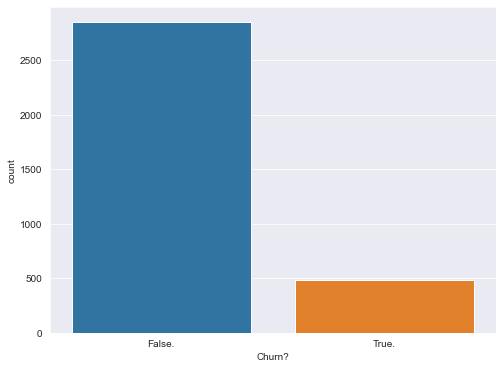

In [5]:
sns.countplot(x='Churn?', data=churn_data)

In [6]:
churn_data["Churn?"].value_counts()

False.    2850
True.      483
Name: Churn?, dtype: int64

In [7]:
churn_true = churn_data[churn_data["Churn?"] == "True."]
churn_false = churn_data[churn_data["Churn?"] == "False."]
print(churn_true.shape)
print(churn_false.shape)

(483, 17)
(2850, 17)


#### 9.3. Downsampling 

In [8]:
from sklearn.utils import resample
churn_falseds = resample(churn_false,
             replace=True, 
             n_samples=len(churn_true), 
             random_state=27)


In [9]:
churn_falseds.shape

(483, 17)

In [10]:
churn_downsampled = pd.concat([churn_true, churn_falseds])

<AxesSubplot:xlabel='Churn?', ylabel='count'>

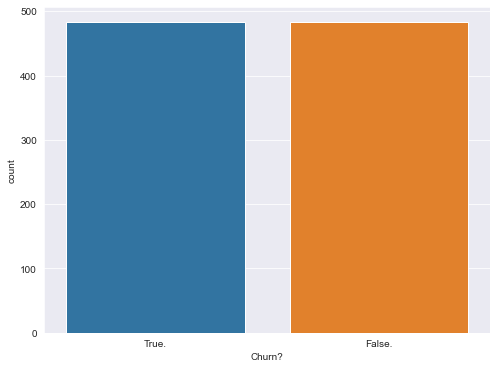

In [11]:
sns.countplot(x='Churn?', data=churn_downsampled)

In [12]:
churn_downsampled["Churn?"].value_counts()

True.     483
False.    483
Name: Churn?, dtype: int64

#### 9.4. Upsampling

In [13]:
from sklearn.utils import resample
churn_trueus = resample(churn_true,
             replace=True, 
             n_samples=len(churn_false), 
             random_state=27)


In [14]:
churn_upsampled = pd.concat([churn_trueus, churn_false])


<AxesSubplot:xlabel='Churn?', ylabel='count'>

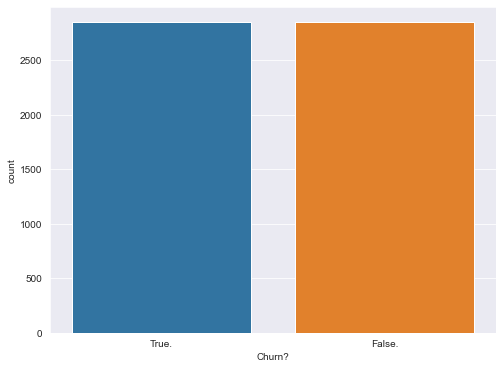

In [15]:
sns.countplot(x='Churn?', data=churn_upsampled)

In [16]:
churn_upsampled["Churn?"].value_counts()

False.    2850
True.     2850
Name: Churn?, dtype: int64

#### 9.5. SMOTE Upsampling

In [17]:
churn_data['Churn?'] = churn_data['Churn?'].map({'True.': 1, 'False.': 0})

In [18]:
y = churn_data[["Churn?"]]
X = churn_data.drop("Churn?", axis = 1)
y["Churn?"].value_counts()

0    2850
1     483
Name: Churn?, dtype: int64

In [19]:
# install imblearn using the following pip command
# pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_us, y_us = sm.fit_resample(X, y)


In [20]:
y_us["Churn?"].value_counts()

1    2850
0    2850
Name: Churn?, dtype: int64

### Exercise 9.1

Look at the following data set. It is highly imbalanced. Try to up sample the following data sample using SMOTE.

In [25]:
churn_data = pd.read_csv("https://raw.githubusercontent.com/IBM/xgboost-smote-detect-fraud/master/data/creditcard.csv")
churn_data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,10,0.385,0.616,-0.874,-0.094,2.925,3.317,0.470,0.538,-0.559,...,0.050,0.238,0.009,0.997,-0.767,-0.492,0.042,-0.054,9.99,0
1,12,-0.752,0.345,2.057,-1.469,-1.158,-0.078,-0.609,0.004,-0.436,...,0.500,1.354,-0.257,-0.065,-0.039,-0.087,-0.181,0.129,15.99,0
2,25,1.114,0.086,0.494,1.336,-0.300,-0.011,-0.119,0.189,0.206,...,-0.053,-0.005,-0.031,0.198,0.565,-0.338,0.029,0.004,4.45,0
3,33,-0.936,0.170,2.746,-1.078,-0.306,0.012,-0.296,0.403,-0.040,...,0.401,1.065,-0.158,0.296,-0.259,0.754,0.047,0.094,9.10,0
4,35,1.199,0.130,0.864,1.003,-0.784,-0.885,-0.041,-0.208,0.392,...,-0.042,0.198,-0.033,1.013,0.559,0.402,-0.006,0.018,0.99,0


#### Solution Here

In [26]:
y = churn_data[["Class"]]
X = churn_data.drop("Class", axis = 1)
y["Class"].value_counts()


0    56772
1      102
Name: Class, dtype: int64

In [27]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_us, y_us = sm.fit_resample(X, y)

y_us["Class"].value_counts()

1    56772
0    56772
Name: Class, dtype: int64